# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os 
import scipy.stats as st

from datetime import date
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output_Data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as its being processed (with the city number and city name).


In [3]:
#set query url and unit measuremnt type
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#set lists to hold df values
name = []
country = []
lat = []
lon = []
max_temp = []
hum = []
clouds = []
wind_speed = []
date = []

#set record and set count
record = 0
set_count = 1

#format print log
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for index, city in enumerate(cities, start = 1): 
    response = requests.get(query_url + city).json()
    #pprint(response)
    
    try:
        name.append(response["name"])
        country.append(response["sys"]["country"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        hum.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        date.append(response["dt"])       
        city_name = response["name"]
        
        if record > 49:
            record = 0
            set_count = set_count + 1
        else:
            record = record + 1
            
        print(f"Processing Record {record} of Set {set_count} | {city_name}")
        
        time.sleep(1)
        
    except:
        print(f"City not found. Skipping...")
    continue
    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-------------------------------
City not found. Skipping...
Processing Record 1 of Set 1 | East London
Processing Record 2 of Set 1 | Upernavik
Processing Record 3 of Set 1 | Buta
City not found. Skipping...
Processing Record 4 of Set 1 | Bukama
Processing Record 5 of Set 1 | Dalnerechensk
Processing Record 6 of Set 1 | Chokurdakh
Processing Record 7 of Set 1 | Peiting
Processing Record 8 of Set 1 | Souillac
Processing Record 9 of Set 1 | Mataura
Processing Record 10 of Set 1 | Beringovskiy
Processing Record 11 of Set 1 | High Level
Processing Record 12 of Set 1 | Kärdla
City not found. Skipping...
Processing Record 13 of Set 1 | Salalah
Processing Record 14 of Set 1 | Casablanca
Processing Record 15 of Set 1 | Kapaa
Processing Record 16 of Set 1 | Tura
Processing Record 17 of Set 1 | Valparaíso
Processing Record 18 of Set 1 | Geraldton
Processing Record 19 of Set 1 | Arman'
Processing Record 20 of Set 1 | Marsh Harbour
Processing Record 21 of Set 1 | São João 

Processing Record 34 of Set 4 | Valença
Processing Record 35 of Set 4 | Nome
Processing Record 36 of Set 4 | Tambacounda
Processing Record 37 of Set 4 | Dawlatabad
Processing Record 38 of Set 4 | Tsaratanana
City not found. Skipping...
Processing Record 39 of Set 4 | Mogadishu
Processing Record 40 of Set 4 | Klaksvík
Processing Record 41 of Set 4 | Caucayá
Processing Record 42 of Set 4 | Khatanga
Processing Record 43 of Set 4 | Rodrigues Alves
Processing Record 44 of Set 4 | Takaungu
Processing Record 45 of Set 4 | Qui Nhon
Processing Record 46 of Set 4 | Rivadavia
Processing Record 47 of Set 4 | Saskylakh
Processing Record 48 of Set 4 | Chumikan
Processing Record 49 of Set 4 | Tuktoyaktuk
Processing Record 50 of Set 4 | Adrar
City not found. Skipping...
Processing Record 0 of Set 5 | Olafsvik
Processing Record 1 of Set 5 | Bandarbeyla
Processing Record 2 of Set 5 | Krasnosel'kup
Processing Record 3 of Set 5 | Uyuni
Processing Record 4 of Set 5 | Taos
Processing Record 5 of Set 5 | Bam

Processing Record 16 of Set 8 | Omsukchan
Processing Record 17 of Set 8 | Lagoa
Processing Record 18 of Set 8 | Marquette
Processing Record 19 of Set 8 | Kidal
Processing Record 20 of Set 8 | Micheweni
Processing Record 21 of Set 8 | Port Augusta
Processing Record 22 of Set 8 | Saldanha
Processing Record 23 of Set 8 | Hay River
Processing Record 24 of Set 8 | Vila Velha
Processing Record 25 of Set 8 | Prince Rupert
Processing Record 26 of Set 8 | Faanui
Processing Record 27 of Set 8 | Boyolangu
City not found. Skipping...
Processing Record 28 of Set 8 | Bacolod City
Processing Record 29 of Set 8 | Kalmunai
Processing Record 30 of Set 8 | Pecos
Processing Record 31 of Set 8 | Dudinka
Processing Record 32 of Set 8 | Nchelenge
Processing Record 33 of Set 8 | Guerrero Negro
Processing Record 34 of Set 8 | Saint Anthony
Processing Record 35 of Set 8 | Deming
Processing Record 36 of Set 8 | Kandrian
Processing Record 37 of Set 8 | Sobolevo
Processing Record 38 of Set 8 | Byron Bay
Processing

Processing Record 2 of Set 12 | Ploemeur
Processing Record 3 of Set 12 | Nizwá
Processing Record 4 of Set 12 | Rāmpura
Processing Record 5 of Set 12 | Kamina
Processing Record 6 of Set 12 | Río Gallegos
Processing Record 7 of Set 12 | Breves
Processing Record 8 of Set 12 | Fairbanks
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame


In [4]:
#create df of city weather 
city_weather = pd.DataFrame({"City": name,
                             "Lat": lat,
                             "Lng": lon,
                             "Max Temp": max_temp,
                             "Humidity": hum,
                             "Cloudiness": clouds,
                             "Wind Speed": wind_speed,
                             "Country": country,
                             "Date": date})

#set output file and write df to a csv
output_file = os.path.join("..", "Output_Data", "cities.csv")

city_weather.to_csv(output_file, index=True, header=True)
city_weather.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,East London,-33.0153,27.9116,73.40,83,40,10.29,ZA,1609867444
1,Upernavik,72.7868,-56.1549,7.32,94,100,27.87,GL,1609867445
2,Buta,2.7858,24.7300,79.34,66,75,1.86,CD,1609867446
3,Bukama,-9.2000,25.8500,72.21,90,69,1.32,CD,1609867448
4,Dalnerechensk,45.9339,133.7225,-16.71,87,1,4.92,RU,1609867449


In [5]:
#calculate descriptive statistics 
city_weather.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02
mean,20.022135,17.411164,50.134376,74.746924,59.553603,8.295062,1.609868e+09
std,33.482138,91.199615,33.228176,18.321924,37.305425,6.112411,2.153970e+02
min,-54.800000,-179.166700,-39.210000,11.000000,0.000000,0.130000,1.609867e+09
25%,-7.633100,-64.261500,33.800000,66.000000,20.000000,3.940000,1.609868e+09
50%,23.565600,21.560600,60.510000,80.000000,75.000000,6.930000,1.609868e+09
75%,48.016700,97.522800,77.000000,88.000000,90.000000,11.180000,1.609868e+09
max,78.218600,179.316700,104.000000,100.000000,100.000000,46.080000,1.609868e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humidity_check = city_weather.loc[city_weather["Humidity"] <= 100]
humidity_check

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,East London,-33.0153,27.9116,73.40,83,40,10.29,ZA,1609867444
1,Upernavik,72.7868,-56.1549,7.32,94,100,27.87,GL,1609867445
2,Buta,2.7858,24.7300,79.34,66,75,1.86,CD,1609867446
3,Bukama,-9.2000,25.8500,72.21,90,69,1.32,CD,1609867448
4,Dalnerechensk,45.9339,133.7225,-16.71,87,1,4.92,RU,1609867449
...,...,...,...,...,...,...,...,...,...
564,Rāmpura,30.2500,75.2333,58.37,89,8,5.95,IN,1609868146
565,Kamina,-8.7386,24.9906,66.18,93,6,2.53,CD,1609868147
566,Río Gallegos,-51.6226,-69.2181,68.00,34,0,11.41,AR,1609868149
567,Breves,-1.6822,-50.4803,90.01,52,77,6.53,BR,1609868150


In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

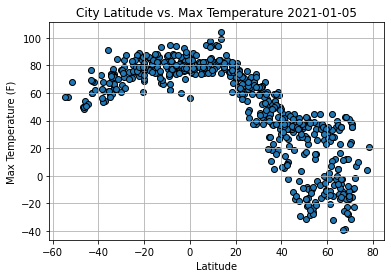

In [11]:
#set variable for current date to print 
today = date.today()

#plot weather data
x_values = city_weather["Lat"]
y_values = city_weather["Max Temp"]
plt.scatter(x_values, y_values, marker='o', edgecolors='black')
plt.grid(b=True, which='major', linestyle='-')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature {today}")

#save figure as png  
plt.savefig("Fig1.png", format='png')

plt.show()

This plot shows the correlation between the max temperature of cities around the world and their latitudinal location.  With 0 on the x-axis being the equator, this plot shows that the maximum temperture at locations around the equator are the warmest, and that there is a moderate negative correlation between latitude and temperature. 

## Latitude vs. Humidity Plot

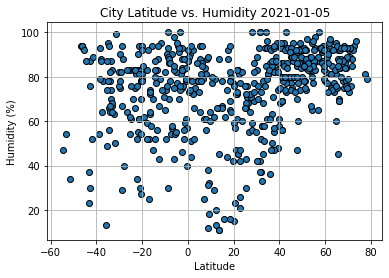

In [12]:
#plot weather data
x_values = city_weather["Lat"]
y_values = city_weather["Humidity"]
plt.scatter(x_values, y_values, marker='o', edgecolors='black')
plt.grid(b=True, which='major', linestyle='-')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity {today}")

#save figure as png  
plt.savefig("Fig2.png", format='png')

plt.show()

This plot shows the correlation between latitudinal location of the city and their humidity level for the current day. Generally, it appears to show no real correlation between location and humidity levels.  

## Latitude vs. Cloudiness Plot

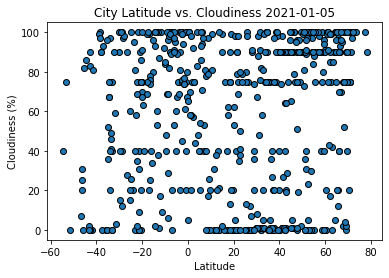

In [13]:
#plot weather data
x_values = city_weather["Lat"]
y_values = city_weather["Cloudiness"]
plt.scatter(x_values, y_values, marker='o', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness {today}")

#save figure as png  
plt.savefig("Fig3.png", format='png')

plt.show()

This plot shows the correlation between latitudinal location of a city and the cloudiness level for the current day.  Generally, it appears to show no real correlation beteen latitude and cloudiness levels. 

## Latitude vs. Wind Speed Plot

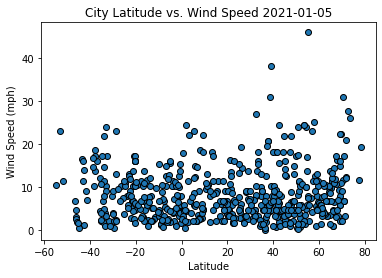

In [14]:
#plot weather data
x_values = city_weather["Lat"]
y_values = city_weather["Wind Speed"]
plt.scatter(x_values, y_values, marker='o', edgecolors='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed {today}")

#save figure as png  
plt.savefig("Fig4.png", format='png')

plt.show()

This plot shows the correlation between latitudinal location of a city and their current wind speed.  Generally, there appears to be no real correlation between location and wind speed. 

## Linear Regression

In [15]:
north = city_weather.loc[city_weather["Lat"] >= 0]
south = city_weather.loc[city_weather["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8358228166421287


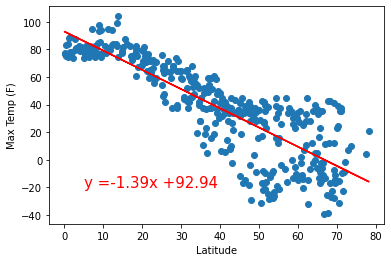

In [16]:
x = north["Lat"]
y = north["Max Temp"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(5, -20), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082856313705967


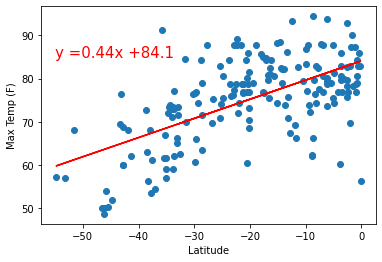

In [17]:
x = south["Lat"]
y = south["Max Temp"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(-55, 85), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.42462495069406575


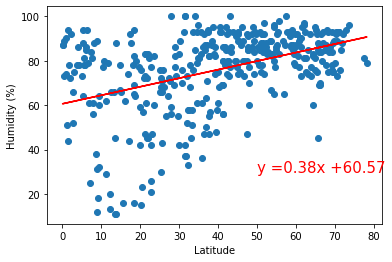

In [18]:
x = north["Lat"]
y = north["Humidity"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(50, 30), fontsize=15, color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0996563714744543


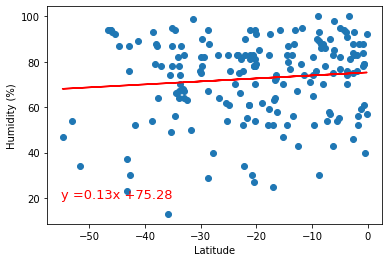

In [19]:
x = south["Lat"]
y = south["Humidity"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(-55, 20), fontsize=13, color='red')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2090173930633705


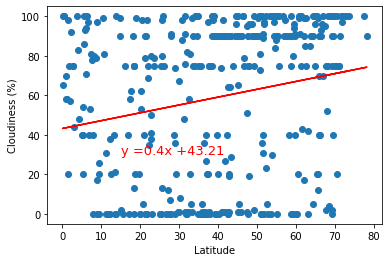

In [20]:
x = north["Lat"]
y = north["Cloudiness"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(15, 30), fontsize=13, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.28434013533681696


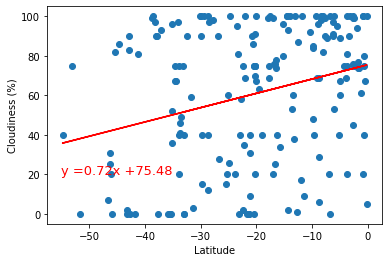

In [21]:
x = south["Lat"]
y = south["Cloudiness"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(-55, 20), fontsize=13, color='red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.1172709477355516


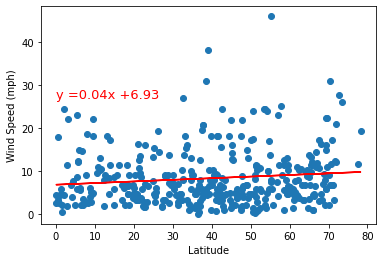

In [22]:
x = north["Lat"]
y = north["Wind Speed"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(0, 27), fontsize=13, color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.17468097273908337


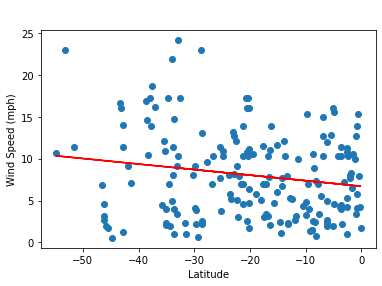

In [23]:
x = south["Lat"]
y = south["Wind Speed"]
corr = st.pearsonr(x, y)[0]
print(f'The r-value is: {corr}')

slp, intr, r, p, std = st.linregress(x,y)
regress = slp * x + intr 
line = "y =" + str(round(slp, 2)) + "x +" + str(round(intr, 2))

plt.scatter(x, y, marker='o')
plt.plot(x, regress, "r-")
plt.annotate(line,(-55, 27), fontsize=13, color='red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()